
In this session, we would like to introduce some metrics for model evaluation firstly. Then we will show how to build neural networks (NNs) model based on [PyTorch](https://pytorch.org/). At last, we will show a classification example using Pytorch.


# Visualizations with Display Objects

We will explore essential metrics for evaluating the performance of classification models. While accuracy is a common metric, it often doesn't tell the whole story. We need more sophisticated tools to understand what kinds of errors our model is making and how it will perform in real-world scenarios

In this example, we will construct display objects,
:class:`ConfusionMatrixDisplay`, :class:`RocCurveDisplay`, and
:class:`PrecisionRecallDisplay` directly from their respective metrics. This
is an alternative to using their corresponding plot functions when
a model's predictions are already computed or expensive to compute. Note that
this is advanced usage, and in general we recommend using their respective
plot functions.


## Load Data and train model


First, let's load a dataset and train a basic classification model. We'll use the "blood transfusion" dataset from OpenML, where the goal is to predict whether a person donated blood (a binary classification task).
We will train a LogisticRegression model, a standard choice for a baseline classifier.



In [2]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


### Create :class:`ConfusionMatrixDisplay`

Accuracy tells us the overall percentage of correct predictions, but it doesn't tell us about the *types* of errors. A **Confusion Matrix** gives us a detailed breakdown. For a binary problem, it shows:
*   **True Positives (TP):** Correctly predicted positive class.
*   **True Negatives (TN):** Correctly predicted negative class.
*   **False Positives (FP):** Incorrectly predicted positive class 
*   **False Negatives (FN):** Incorrectly predicted negative class 



With the fitted model, we compute the predictions of the model on the test
dataset. These predictions are used to compute the confustion matrix which
is plotted with the :class:`ConfusionMatrixDisplay`



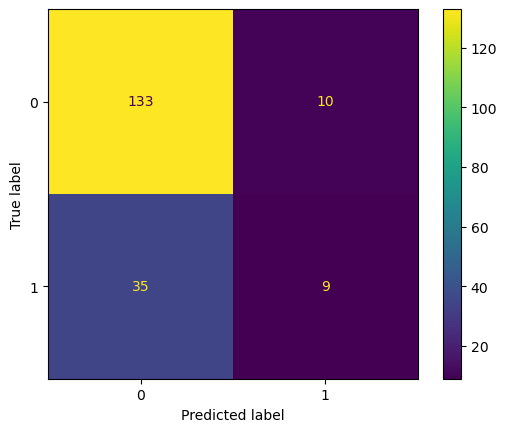

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

*   **Precision:** Of all the times the model predicted "positive", how many were actually correct? (`TP / (TP + FP)`). High precision means a low false positive rate.
*   **Recall (Sensitivity):** Of all the actual positive cases, how many did the model correctly identify? (`TP / (TP + FN)`). High recall means a low false negative rate.
*   **F1-Score:** The harmonic mean of Precision and Recall. It provides a single score that balances both metrics.

### Create :class:`RocCurveDisplay`


The **Receiver Operating Characteristic (ROC) Curve** is a fundamental tool for evaluating binary classifiers. It plots the **True Positive Rate (Recall)** against the **False Positive Rate** at various decision thresholds.

*   A model that is no better than random guessing will have a line close to the diagonal.
*   A good model will have a curve that bows towards the top-left corner.

The **Area Under the Curve (AUC)** summarizes the entire ROC curve into a single number.
*   **AUC = 1.0:** Perfect classifier.
*   **AUC = 0.5:** No better than random chance.


The roc curve requires either the probabilities or the non-thresholded
decision values from the estimator. Since the logistic regression provides
a decision function, we will use it to plot the roc curve:



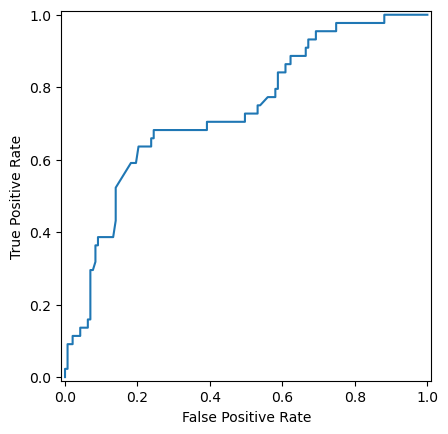

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Create :class:`PrecisionRecallDisplay`
 Similarly, the precision recall curve can be plotted using `y_score` from
 the prevision sections.



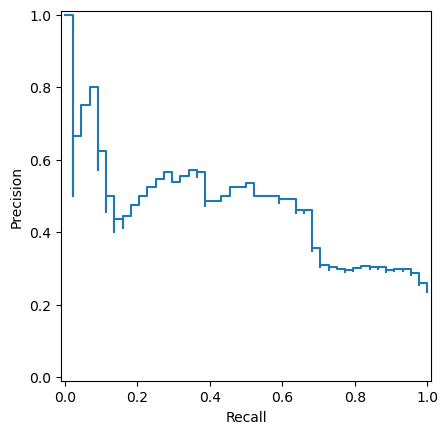

In [7]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

### Combining the display objects into a single plot
 The display objects store the computed values that were passed as arguments.
 This allows for the visualizations to be easliy combined using matplotlib's
 API. In the following example, we place the displays next to each other in a
 row.



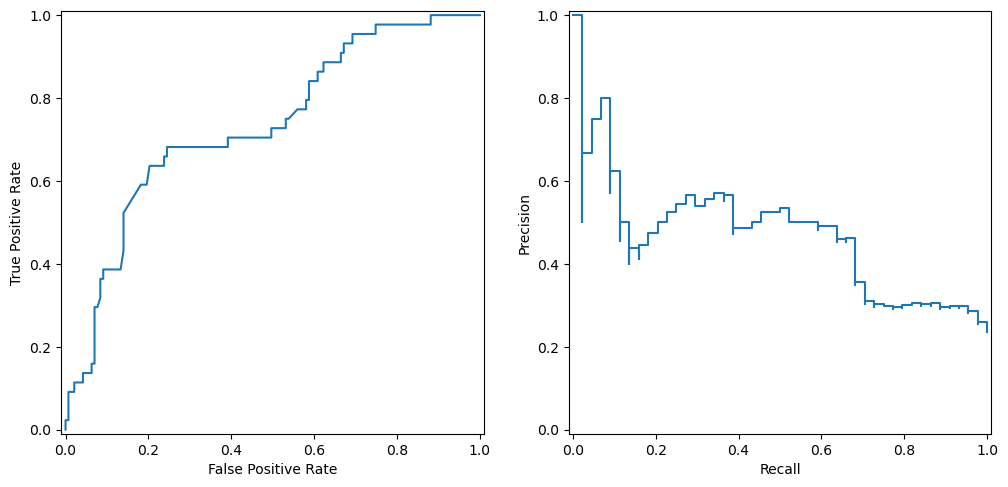

In [8]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

### F-1 Score
The harmonic mean of Precision and Recall. It provides a single score that balances both metrics.

In [9]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, pos_label= clf.classes_[1])

0.2857142857142857